# **Script for creating experiment files for auditory brainstem response (ABR) experiments**

## Script Info
---
- This script creates a .wav file with audio-triggered /da/ syllables - commonly used in auditory neuroscience for evoking ABRs.

- This particular implementation uses the ABR paradigm suggested in the work of G. M. Bidelman (2015). As such, this implementation can be used to analyse both cortical and subcortical responses to the chosen stimuli. For further information, please read the paradigm's original paper¹. A visual representation of the paradigm principle is given below:
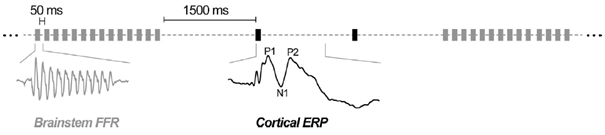

- You can easily adapt this script to your own needs by swapping out the syllable stimulus file and adapting parameters like inter stimulus interval (ISI) duration, number of sweeps per block, etc. etc.

- The script was written and tested in a Google Colab notebook. You can easily just drag & drop this script in there and have it run. Make sure to plug in your own directory paths and already audio-triggered syllable .wav  file. Alternatively, you can use the cut and triggered /da/ syllable file, that's included in this repository.

- For questions and inquiries, contact julian.ockelmann@uzh.ch

- ¹ Bidelman, G. M. (2015). Towards an optimal paradigm for simultaneously recording cortical and brainstem auditory evoked potentials. Journal of neuroscience methods, 241, 94-100.

## Contact
---
Author of this script:
- Julian Ockelmann, PhD
- Computational Neuroscience of Speech & Hearing
- University of Zurich
- julian.ockelmann@uzh.ch

## Libraries, Modules & Directories
---



In [ ]:
# Install necessary libraries
!pip install pydub
!add-apt-repository -y ppa:savoury1/ffmpeg4
!apt-get -qq install -y ffmpeg

In [10]:
# Import necessary modules
import os
import ffmpeg
from pydub import AudioSegment
from google.colab import files                                                  # Only necessary if you're executing the code in a google colab environment

In [1]:
# Optional: Mount Google Drive for using cloud-stored data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set Directories (Replace with desired Working Directory)
wd = '/content/drive/MyDrive/Colab Notebooks/Audio_Files/'                      # Folder containing cut stimulus files
os.chdir(wd)                                                                    # Sets current working directory to previously defined folder

## Create Silent ISI Segments
---



In [17]:
# Create 50ms empty audio file
duration_50 = 50                                                        # ISI for the subcortical response sweeps. Set the duration of desired ISI in milliseconds

# Create an empty audio segment
empty_audio_50ms = AudioSegment.silent(duration=duration_50)

In [27]:
# Create 1500ms empty audio file

# Set the duration in milliseconds
duration_1500 = 1500                                                            # # ISI for the cortical response sweeps. Set the duration of desired ISI in milliseconds


# Create an empty audio segment
empty_audio_1500ms = AudioSegment.silent(duration=duration_1500)

## Create Stimulus Syllable Segments
---



In [46]:
# %% Combine /da/ Stimulus Segment with 50ms ISI Segment

# Load the existing audio file
da_syllable = AudioSegment.from_file("da_syllable_trigger.wav", format="wav")

# Add the empty audio segment to the existing audio
da_burst_50ms = empty_audio_50ms + da_syllable

In [47]:
# %% Combine Audio Segments 1500ms ISI /da/

# Add the empty audio segment to the existing audio
da_burst_1500ms = empty_audio_1500ms + da_syllable

In [48]:
# Create Block of 14 /DA/ bursts with 50ms ISI
da_block_14_50ms = da_burst_50ms

for i in range(13):
    da_block_14_50ms += da_burst_50ms                                           # Should produce a block of 14 /da/ syllables with 50ms breaks inbetween stimuli

In [49]:
# Create Block of 2 /DA/ bursts with 1500ms ISI
da_block_2_1500ms = da_burst_1500ms

da_block_2_1500ms += da_burst_1500ms + empty_audio_1500ms                       # Should produce a block of 2 /da/ syllables with 1500ms breaks before, inbetween, and after the 2 stimuli

In [ ]:
# %% Check integrity of final ABR burst audio (short sweeps)
da_block_14_50ms                                                                # Block of 14 /DA/ syllables, with 50ms inbetween

In [ ]:
# %% Check integrity of final ABR burst audio (long sweeps)
da_block_2_1500ms                                                               # Block of 2 /da/ syllables, with 1500ms before, between, and after

In [56]:
# %% Create final building blocks
Combined_Block = da_block_14_50ms
Combined_Block += da_block_2_1500ms

# Extract & Download Final File
---

In [57]:
# %% Create final ABR File
Final_DA_sABR_3200_Sweeps = Combined_Block * 200                                # Make a sequence of 200 combined blocks (2800 Subcortical 50ms ISI sweeps, 400 Cortical 1500ms ISI sweeps)

# Export/Download final ABR file
Final_DA_sABR_3200_Sweeps.export("Final_DA_sABR_3200_Sweeps.wav", format="wav") # Export final sABR audio file - || the default bit rate should be 1411 kbps, bit rates can be changed using the bitrate argument in the audio.export() function. - ||e.g.: audio.export("output.wav", format="wav", bitrate="16k")
files.download('Final_DA_sABR_3200_Sweeps.wav')                                 # Optional: For Google Colab users, this downloads the exported file from the environment

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>